# Data exploration

>*Start by some quick data exploration. Perform the following tasks*
> * *Plot a few images from each category*
> * *Make a scree plot, how many components explain 10%, 20%, …, 90% and 100% of the variance?*
> * *Visualize the features on a 2d-plot with PCA using the first two components. What can you say about the results?*

I am going to start by loading the images, features and labels from the train set.

In [1]:
# Import numpy
import numpy as np

# Load the npz train file and save the variables
with np.load('train.npz', allow_pickle=False) as npz_file:
    # Print the shape of the arrays
    images = npz_file['images']
    features = npz_file['features'] 
    labels = npz_file['labels']
    names = npz_file['names']

### Plot some images

I am going to plot 3 images for each category.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

Label: 0 (bike)


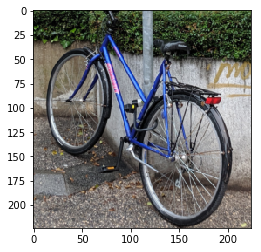

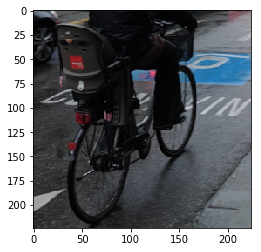

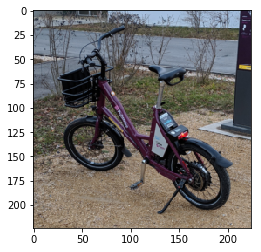

Label: 1 (car)


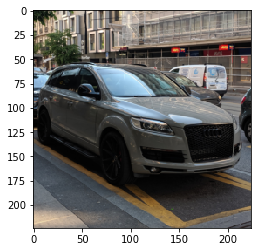

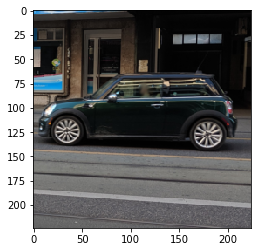

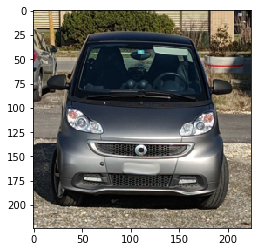

Label: 2 (motorcycle)


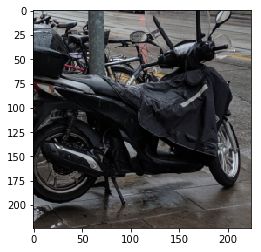

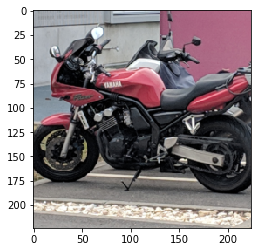

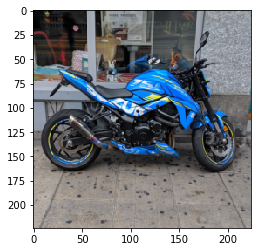

Label: 3 (other)


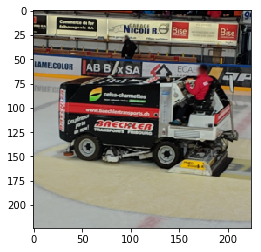

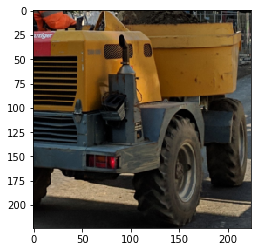

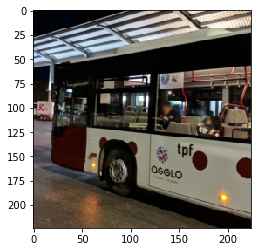

Label: 4 (truck)


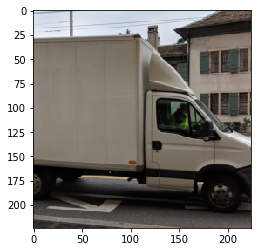

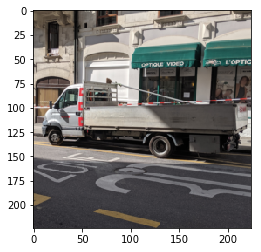

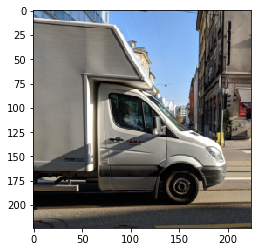

Label: 5 (van)


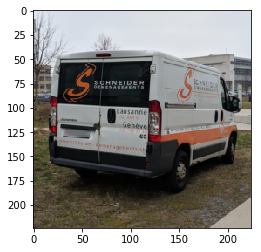

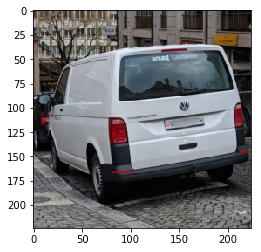

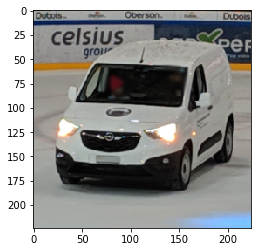

In [3]:
# start with a category and search for three images
for label in np.arange(6):
    n=0
    print('Label: {} ({})'.format(label, names[label]))
    for photo in np.arange(labels.shape[0]):
        if labels[photo]==label: 
            n=n+1
            plt.imshow(images[photo])
            plt.show()
            if n==3:
                break

### Scree Plot

In order to do a scree plot I have to find the principal components. For that I am going to apply a PCA transformer to the features.

In [4]:
from sklearn.decomposition import PCA

# Create PCA transformer without specifying the number of components 
pca = PCA(n_components=None)

# Apply PCA and get components
components=pca.fit_transform(features, y=None);
components.shape

(281, 281)

In [5]:
# Get proportion of variance explained
pve = pca.explained_variance_ratio_

In [6]:
# Compute cumulative sum of the proportion of variance explained
pve_cumsum = np.cumsum(pve)

In order to check how many components explain 10%, 20%, …, 90% and 100% of the variance I am going to create an array with the levels (10%,20%,...,100%) and then I check for every level what is the number of components needed to have a cumulative sum of the proportion of variance explained higher than that level.

In [7]:
# create an array with the levels (10%,20%,...,100%)
pve_levels=np.arange(10,101,10)/100

# create an array to save the number of components and the proportion of variance explained
save=np.array([], dtype=np.float64)

# save for every level what is the number of components needed to have a cumulative sum of the proportion of variance explained higher than that level 
for level in pve_levels:
    for i in np.arange(281): 
        if pve_cumsum[i]>level:
            save=np.append(save,np.array([i+1,pve_cumsum[i]]))
            break

In [8]:
# reshape the array
save=save.reshape(9,2)

In [9]:
save

array([[1.00000000e+00, 1.34469703e-01],
       [2.00000000e+00, 2.08628267e-01],
       [4.00000000e+00, 3.12155426e-01],
       [9.00000000e+00, 4.09847945e-01],
       [1.70000000e+01, 5.03826976e-01],
       [3.00000000e+01, 6.00150764e-01],
       [5.00000000e+01, 7.00793326e-01],
       [8.10000000e+01, 8.00522804e-01],
       [1.35000000e+02, 9.01261866e-01]])

In order to do the scree plot I am going to plot the proportion of variance explained for every principal component. I could not do a bar chart in this case as there are a lot of components. I am goint to add a cumulative plot that shows how many components explain 10%, 20%, …, 90% and 100% of the variance with the array that I created above.

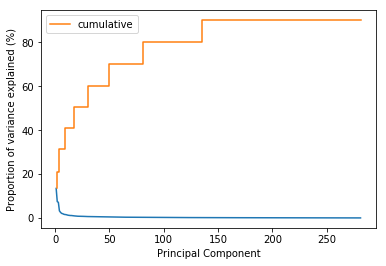

In [10]:
# plot the proportion of variance explained for every principal component
plt.plot(np.arange(1, len(pve) + 1),pve*100)

# cumulative plot that shows how many components explain 10%, 20%, …, 90% and 100% of the variance 
plt.step(
    np.append(save[1:10,0],[281]),
    save[:,1]*100, # Cumulative sum
    label='cumulative'
)
# Add labels
plt.xlabel('Principal Component')
plt.ylabel('Proportion of variance explained (%)')
plt.legend()
plt.show()

### 2d-Plot

In order to visualize the features on a 2d-plot with PCA using the first two components, I am going to group the images by category and plot the 1st and 2nd component computed above.

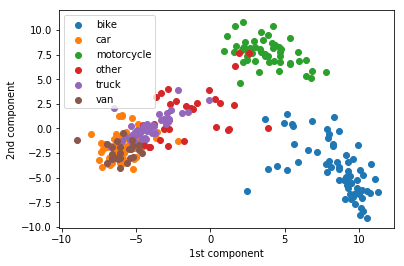

In [11]:
# Group images by category
for label in np.arange(0,6):
    idx = (labels == label)
    # Plot their first two components
    plt.scatter(
        components[idx, 0], components[idx, 1],
        label=names[label]
    )
# Labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

We can see that we can distinguish three groups in this feature space: bikes, motorcycles and the other categories.
This shows that PCA was able to capture high level information enough to distinguish these three groups. Being able to distinguish these three groups with only two components is a very good result. As cars, trucks and vans have more things in common (4 weals for example), we would need more information to distinguish them. 